In [ ]:
# Import all necessary packages
from google.colab import files
import pandas as pd
import io
import seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from scipy.stats import chi2
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import warnings
warnings.filterwarnings("ignore")

First Dataset - Mortality Dataset

In [ ]:
uploaded = files.upload()
df_Mortality = pd.read_csv(io.BytesIO(uploaded['Mortality Dataset.csv']))
df_Mortality.head()

Saving Mortality Dataset.csv to Mortality Dataset.csv


age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [ ]:
# Summary statistics
df_Mortality.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [ ]:
# Drop the categorical variables row for better visualization
df_Mortality_num = df_Mortality.drop('anaemia', axis=1)
df_Mortality_num = df_Mortality_num.drop('diabetes', axis=1)
df_Mortality_num = df_Mortality_num.drop('high_blood_pressure', axis=1)
df_Mortality_num = df_Mortality_num.drop('sex', axis=1)
df_Mortality_num = df_Mortality_num.drop('smoking', axis=1)
df_Mortality_num = df_Mortality_num.drop('DEATH_EVENT', axis=1)

In [ ]:
df_Mortality_num

age  creatinine_phosphokinase  ejection_fraction  platelets  \
0    75.0                       582                 20  265000.00   
1    55.0                      7861                 38  263358.03   
2    65.0                       146                 20  162000.00   
3    50.0                       111                 20  210000.00   
4    65.0                       160                 20  327000.00   
..    ...                       ...                ...        ...   
294  62.0                        61                 38  155000.00   
295  55.0                      1820                 38  270000.00   
296  45.0                      2060                 60  742000.00   
297  45.0                      2413                 38  140000.00   
298  50.0                       196                 45  395000.00   

     serum_creatinine  serum_sodium  time  
0                 1.9           130     4  
1                 1.1           136     6  
2                 1.3           129     7  
3                 1.9           137     7  
4                 2.7           116     8  
..                ...           ...   ...  
294               1.1           143   270  
295               1.2           139   271  
296               0.8           138   278  
297               1.4           140   280  
298               1.6           136   285  

[299 rows x 7 columns]

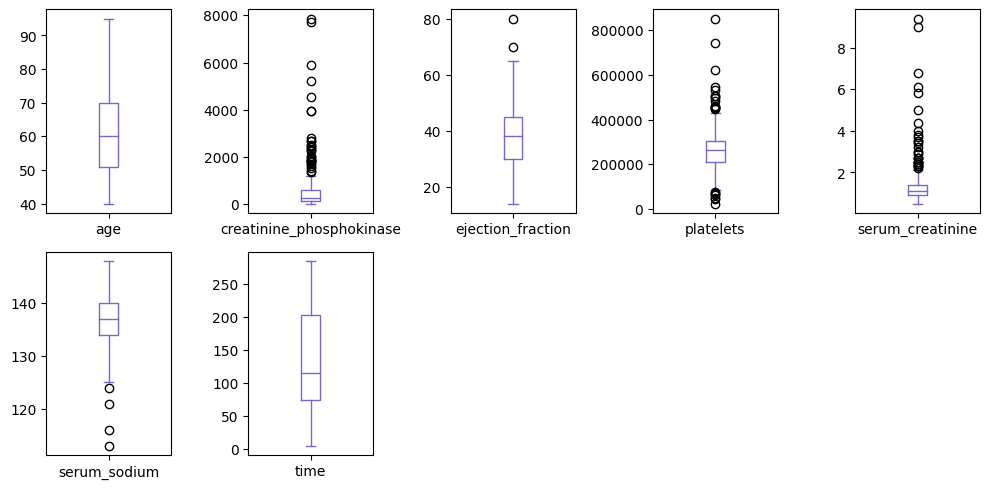

In [ ]:
# Visual representation of data.describe()
df_Mortality_num.plot(kind='box', subplots=True, layout=(2, 5), figsize=(10, 5), color='#7569c9')
plt.tight_layout()
plt.show()

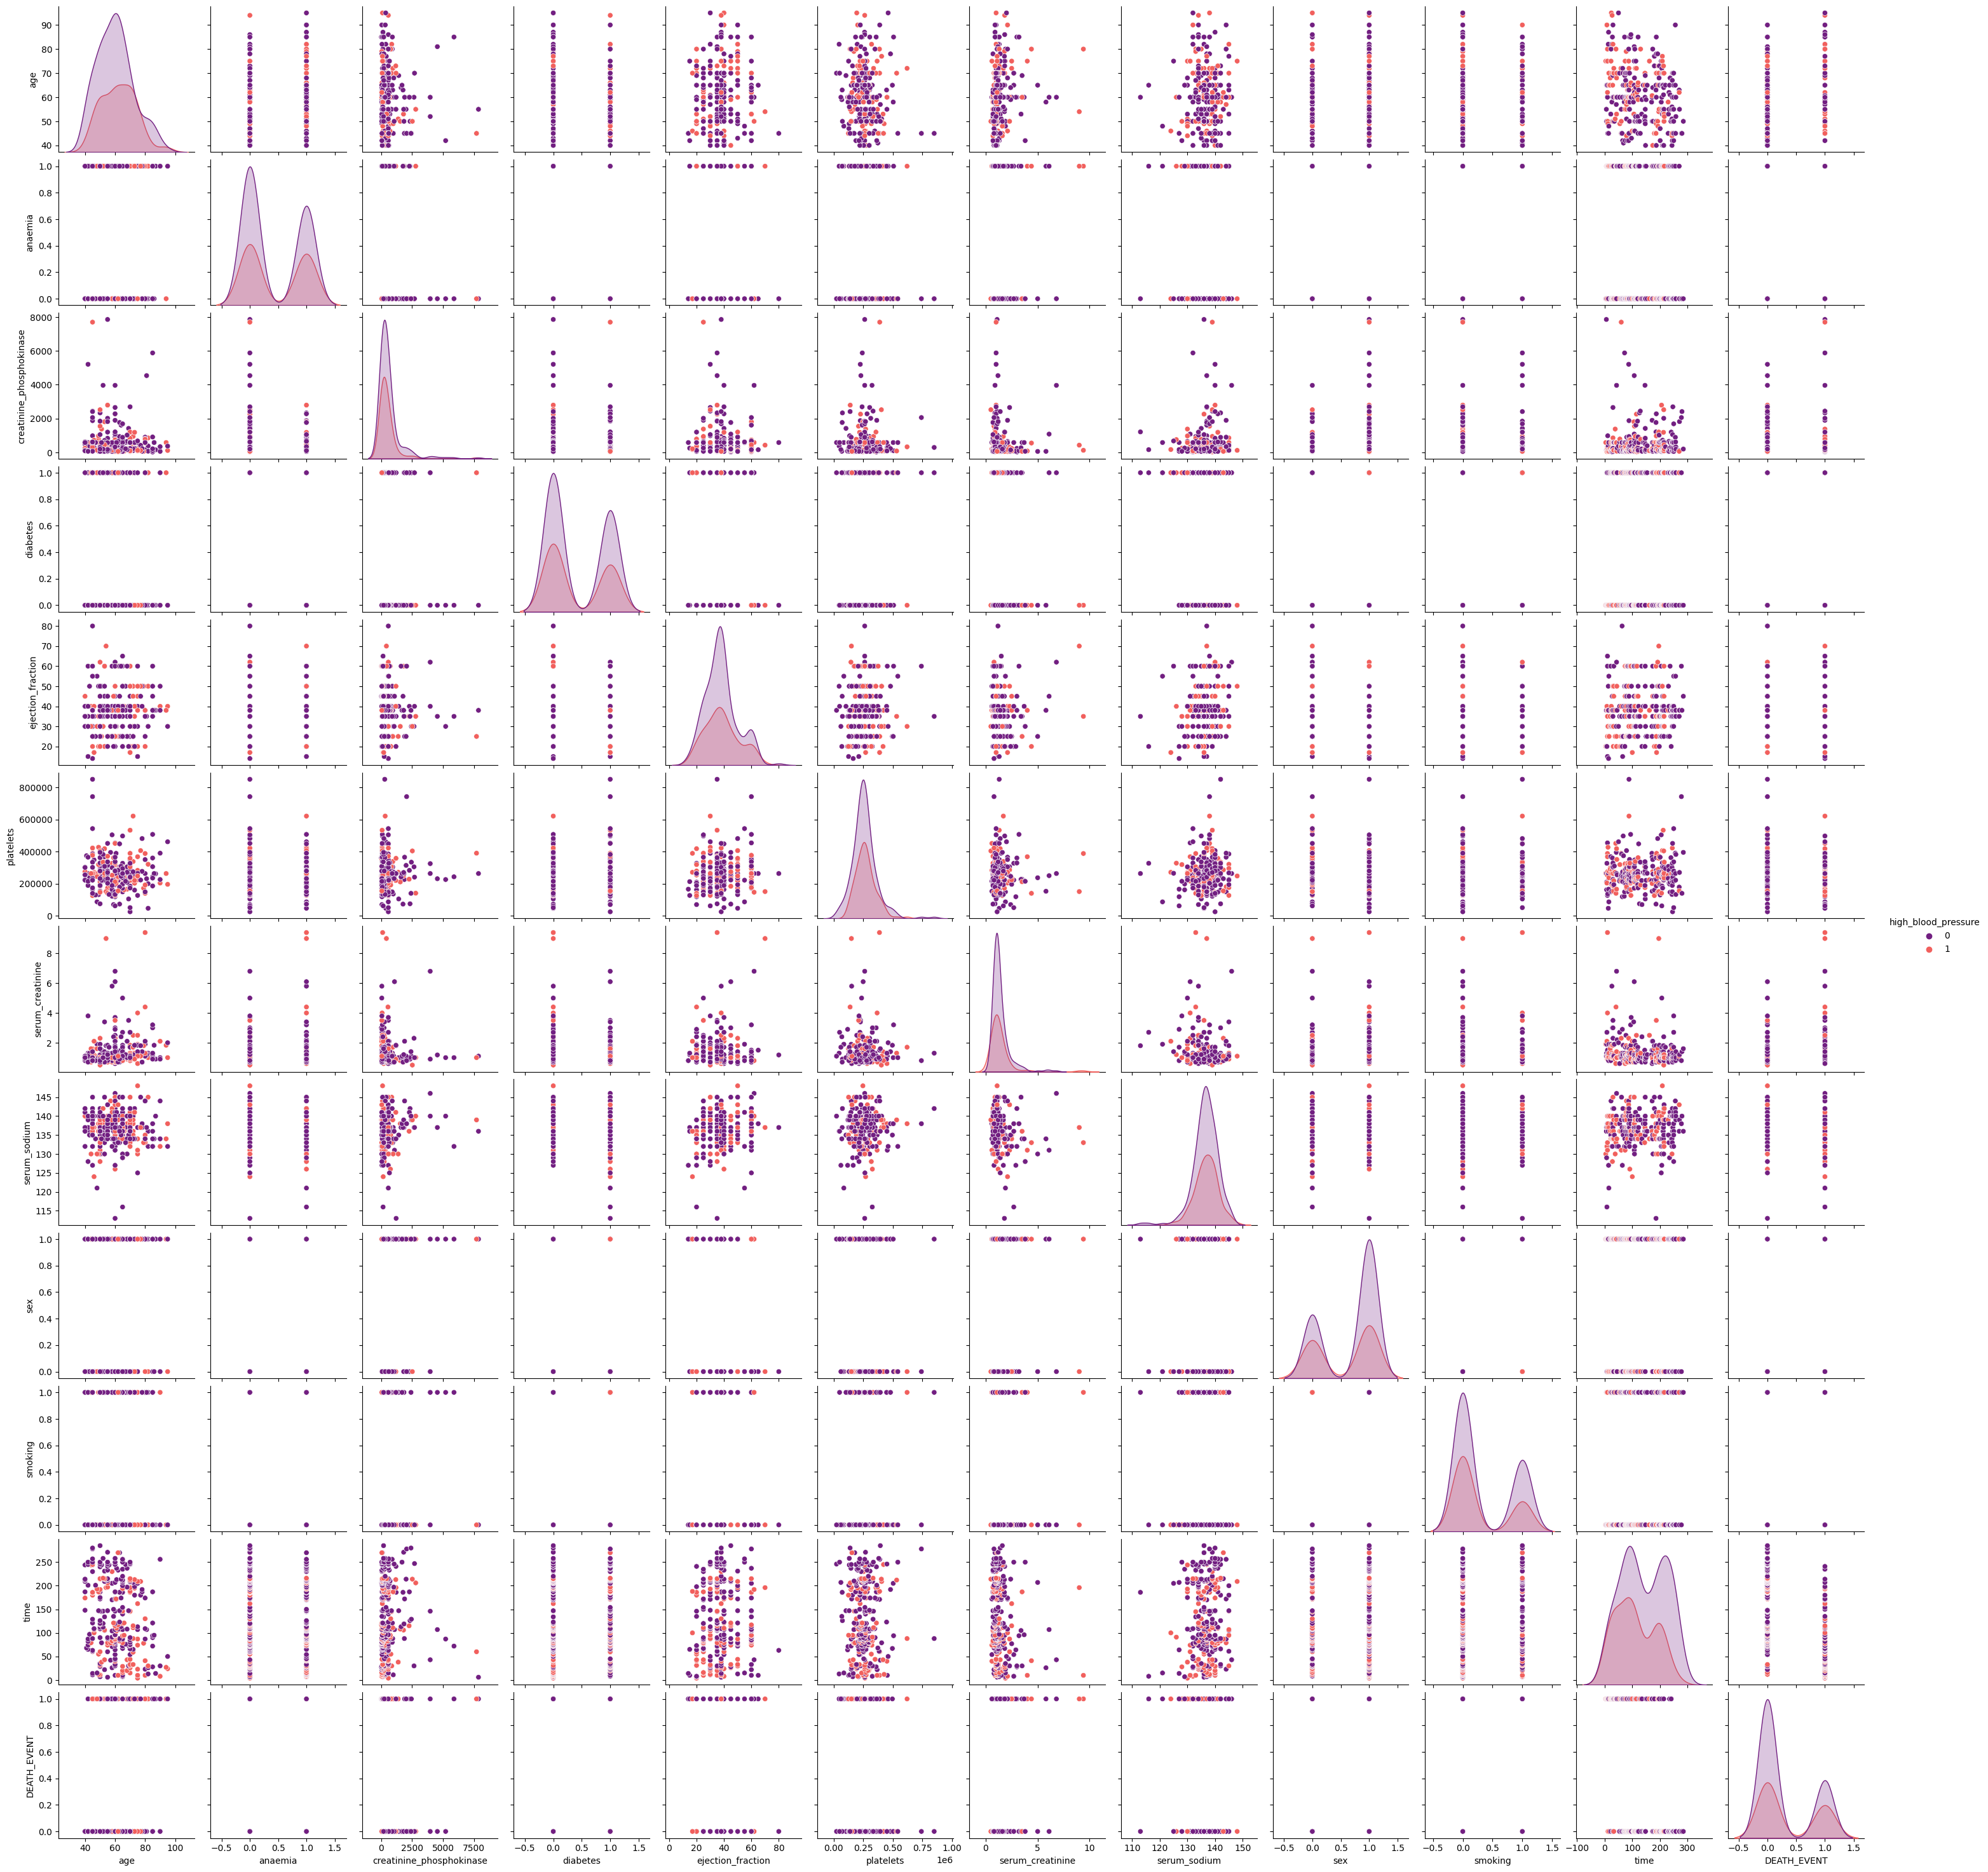

In [ ]:
# Display pair plot for data visualization
sns.pairplot(df_Mortality, hue='high_blood_pressure', palette="magma")
plt.show()

Blood Enzyme (CPK) vs high blood pressure

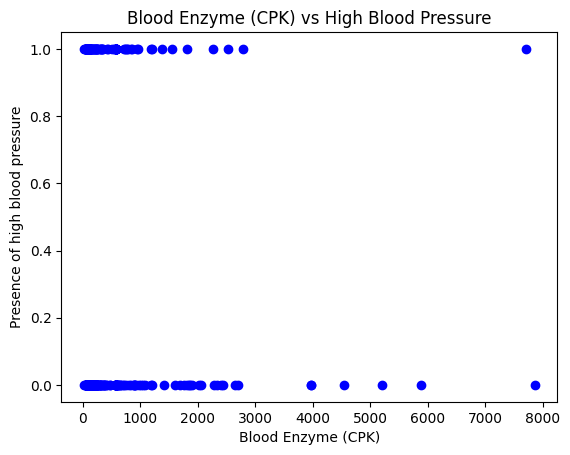

In [ ]:
plt.scatter(df_Mortality['creatinine_phosphokinase'],
            df_Mortality['high_blood_pressure'], color='blue')
plt.xlabel('Blood Enzyme (CPK)')
plt.ylabel('Presence of high blood pressure')
plt.title('Blood Enzyme (CPK) vs High Blood Pressure')
plt.show()

Blood Sodium Level vs high blood pressure

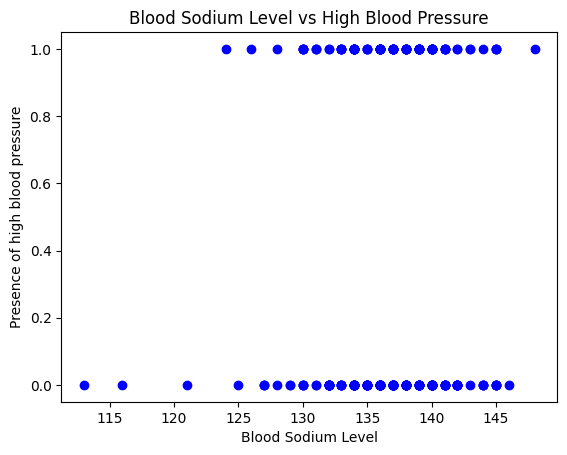

In [ ]:
plt.scatter(df_Mortality['serum_sodium'],
            df_Mortality['high_blood_pressure'], color='blue')
plt.xlabel('Blood Sodium Level')
plt.ylabel('Presence of high blood pressure')
plt.title('Blood Sodium Level vs High Blood Pressure')
plt.show()

Smoking vs high blood pressure

In [ ]:
contingencysmoke= pd.crosstab(df_Mortality['smoking'], df_Mortality['high_blood_pressure'])
contingencysmoke

# plt.scatter(df_Mortality['smoking'],
#             df_Mortality['high_blood_pressure'], color='blue')
# plt.xlabel('Smoking Status')
# plt.ylabel('Presence of high blood pressure')
# plt.title('Smoking Status vs High Blood Pressure')
# plt.show()contingencymale.plot.bar(figsize=(6,4), rot=0)

high_blood_pressure    0   1
smoking                     
0                    128  75
1                     66  30

<Axes: xlabel='high_blood_pressure', ylabel='smoking'>

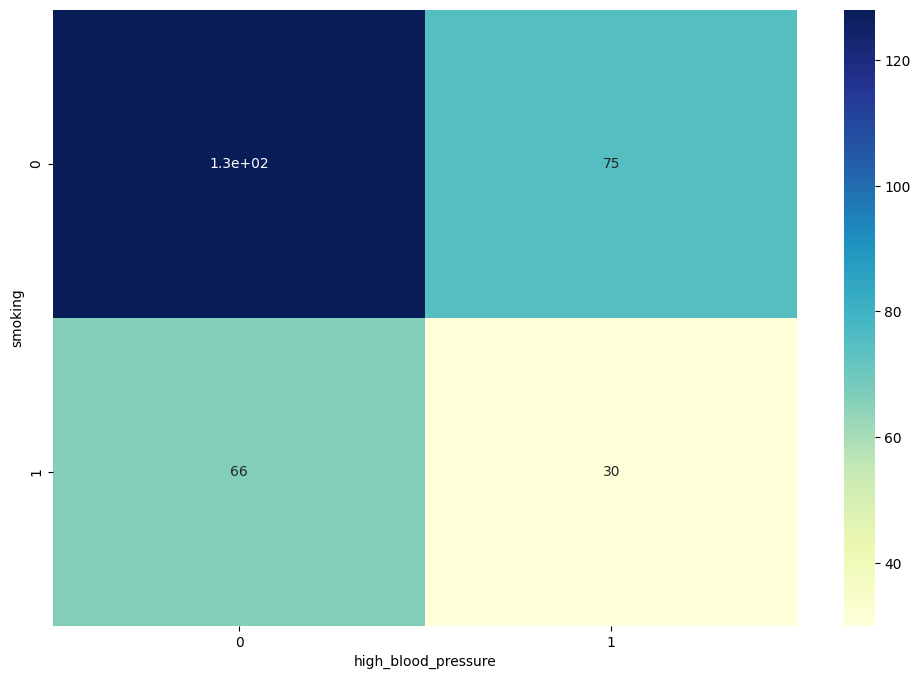

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(contingencysmoke, annot=True, cmap="YlGnBu")

<Axes: xlabel='smoking'>

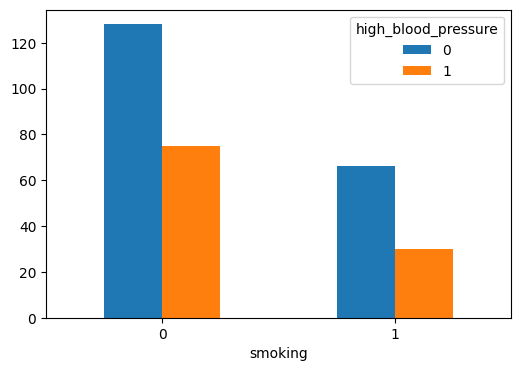

In [ ]:
contingencysmoke.plot.bar(figsize=(6,4), rot=0)

In [ ]:
df_Mortality_male = df_Mortality[df_Mortality['sex'] == 1]
df_Mortality_male

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
5    90.0        1                        47         0                 40   
..    ...      ...                       ...       ...                ...   
292  52.0        0                       190         1                 38   
293  63.0        1                       103         1                 35   
294  62.0        0                        61         1                 38   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
5                      1  204000.00               2.1           132    1   
..                   ...        ...               ...           ...  ...   
292                    0  382000.00               1.0           140    1   
293                    0  179000.00               0.9           136    1   
294                    1  155000.00               1.1           143    1   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
5          1     8            1  
..       ...   ...          ...  
292        1   258            0  
293        1   270            0  
294        1   270            0  
297        1   280            0  
298        1   285            0  

[194 rows x 13 columns]

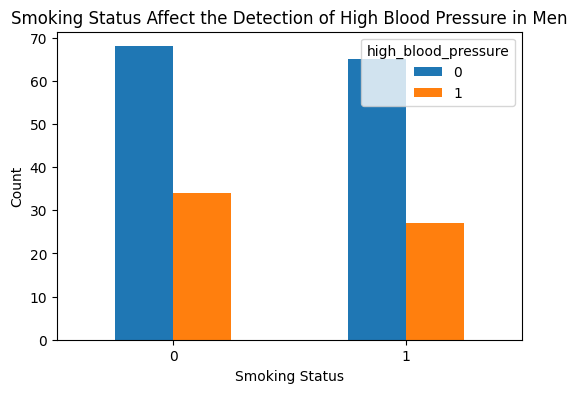

In [ ]:
contingency_male = pd.crosstab(df_Mortality_male['smoking'],
                               df_Mortality_male['high_blood_pressure'])
contingency_male.plot.bar(figsize=(6,4), rot=0)
plt.title('Smoking Status Affect the Detection of High Blood Pressure in Men')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

In [ ]:
df_Mortality_female = df_Mortality[df_Mortality['sex'] == 0]
df_Mortality_female

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
4    65.0        1                       160         1                 20   
8    65.0        0                       157         0                 65   
14   49.0        1                        80         0                 30   
18   70.0        1                       125         0                 25   
19   48.0        1                       582         1                 55   
..    ...      ...                       ...       ...                ...   
288  65.0        0                       892         1                 35   
289  90.0        1                       337         0                 38   
290  45.0        0                       615         1                 55   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
4                      0  327000.00               2.7           116    0   
8                      0  263358.03               1.5           138    0   
14                     1  427000.00               1.0           138    0   
18                     1  237000.00               1.0           140    0   
19                     0   87000.00               1.9           121    0   
..                   ...        ...               ...           ...  ...   
288                    0  263358.03               1.1           142    0   
289                    0  390000.00               0.9           144    0   
290                    0  222000.00               0.8           141    0   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   

     smoking  time  DEATH_EVENT  
4          0     8            1  
8          0    10            1  
14         0    12            0  
18         0    15            1  
19         0    15            1  
..       ...   ...          ...  
288        0   256            0  
289        0   256            0  
290        0   257            0  
295        0   271            0  
296        0   278            0  

[105 rows x 13 columns]

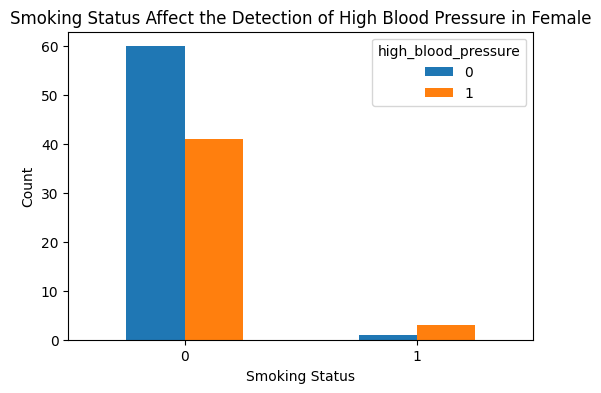

In [ ]:
contingency_female = pd.crosstab(df_Mortality_female['smoking'],
                               df_Mortality_female['high_blood_pressure'])
contingency_female.plot.bar(figsize=(6,4), rot=0)
plt.title('Smoking Status Affect the Detection of High Blood Pressure in Female')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

In [ ]:
contingency_male

high_blood_pressure   0   1
smoking                    
0                    68  34
1                    65  27

In [ ]:
contingency_female

high_blood_pressure   0   1
smoking                    
0                    60  41
1                     1   3

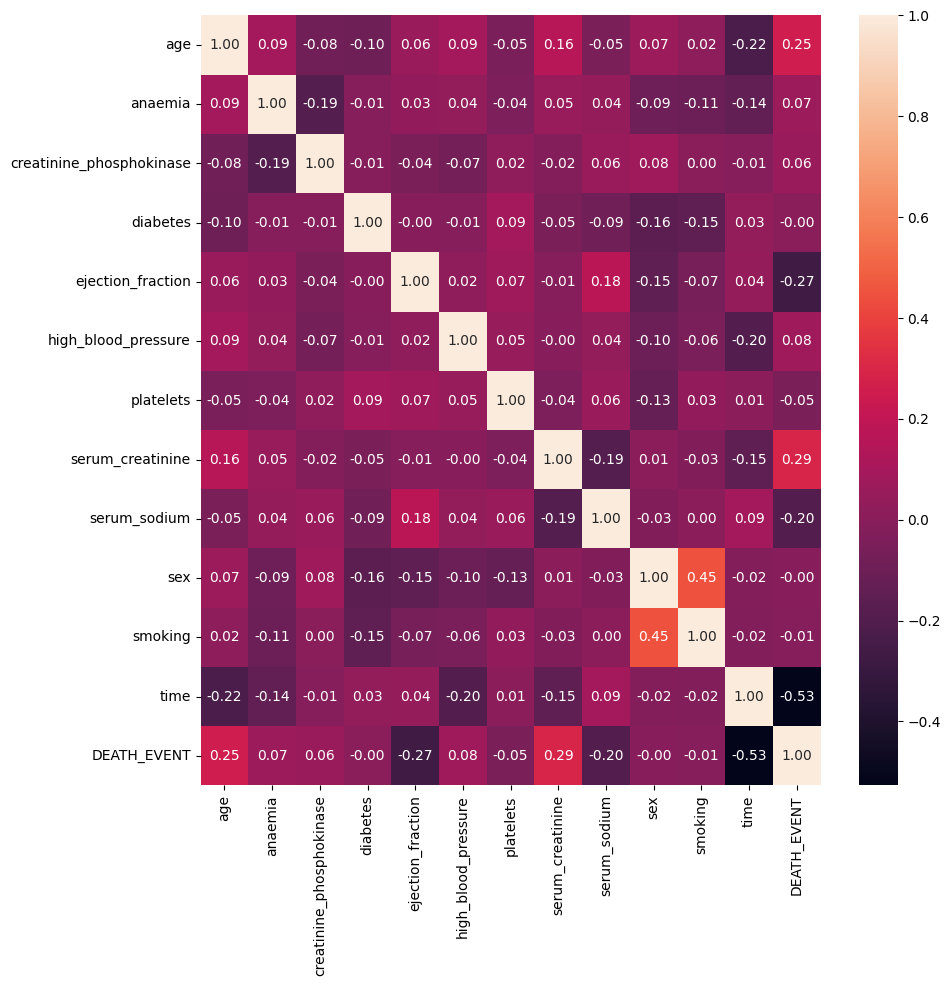

In [ ]:
# We want to check the correlation between 2 different features
correlation = df_Mortality.corr()
seaborn.heatmap (correlation, annot = True, fmt=".2f")
plt.gcf().set_size_inches(10, 10)

In [ ]:
# Apply Logistic Regression,
# I think here, we need more discussion because I think we should focus more on the
# death event and not all the variables that we mentioned in Tuesday can apply
# logistic regression there.



In [ ]:
from google.colab import files
uploaded = files.upload()
df_Cardiovascular = pd.read_csv(io.BytesIO(uploaded['Cardiovascular Event Dataset.csv']))
df_Cardiovascular.head()

Saving Cardiovascular Event Dataset.csv to Cardiovascular Event Dataset.csv


id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [ ]:
# Check for missing values in the dataset,
print(df_Cardiovascular.isna().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
df_Cardiovascular.fillna(df_Cardiovascular.median(), inplace=True)

In [ ]:
# Check for missing values in the dataset,
print(df_Cardiovascular.isna().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [ ]:
# Encode all the categorical variables
# Encode gender:
df_Cardiovascular['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [ ]:
# create a helper fucntion
def categorize_gender(gender):
    if gender == 'Female':
      return 0
    elif gender == 'Male':
      return 1
    else:
      return 2
df_Cardiovascular['gender'] = df_Cardiovascular['gender'].apply(categorize_gender)
df_Cardiovascular.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046       1  67.0             0              1          Yes   
1  51676       0  61.0             0              0          Yes   
2  31112       1  80.0             0              1          Yes   
3  60182       0  49.0             0              0          Yes   
4   1665       0  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21  28.1     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [ ]:
# Encoded ever_married:
df_Cardiovascular['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
# create a helper fucntion
def categorize_ever_married(ever_married):
    if ever_married == 'No':
      return 0
    else:
      return 1
df_Cardiovascular['ever_married'] = df_Cardiovascular['ever_married'].apply(categorize_ever_married)
df_Cardiovascular.head()

id  gender   age  hypertension  heart_disease  ever_married  \
0   9046       1  67.0             0              1             1   
1  51676       0  61.0             0              0             1   
2  31112       1  80.0             0              1             1   
3  60182       0  49.0             0              0             1   
4   1665       0  79.0             1              0             1   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21  28.1     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [ ]:
# Encoded work_type
df_Cardiovascular['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [ ]:
# create a helper fucntion
def categorize_work_type(work_type):
    if work_type == 'Never_worked':
      return 0
    elif work_type == 'children':
      return 1
    elif work_type == 'Self-employed':
      return 2
    elif work_type == 'Private':
      return 3
    else:
      return 4

df_Cardiovascular['work_type'] = df_Cardiovascular['work_type'].apply(categorize_work_type)
df_Cardiovascular.head()

id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0   9046       1  67.0             0              1             1          3   
1  51676       0  61.0             0              0             1          2   
2  31112       1  80.0             0              1             1          3   
3  60182       0  49.0             0              0             1          3   
4   1665       0  79.0             1              0             1          2   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21  28.1     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1

In [ ]:
# Encoded Residence_type
df_Cardiovascular['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [ ]:
# create a helper fucntion
def categorize_Residence_type(Residence_type):
    if Residence_type == 'Rural':
      return 0
    else:
      return 1
df_Cardiovascular['Residence_type'] = df_Cardiovascular['Residence_type'].apply(categorize_Residence_type)
df_Cardiovascular.head()

id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0   9046       1  67.0             0              1             1          3   
1  51676       0  61.0             0              0             1          2   
2  31112       1  80.0             0              1             1          3   
3  60182       0  49.0             0              0             1          3   
4   1665       0  79.0             1              0             1          2   

   Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0               1             228.69  36.6  formerly smoked       1  
1               0             202.21  28.1     never smoked       1  
2               0             105.92  32.5     never smoked       1  
3               1             171.23  34.4           smokes       1  
4               0             174.12  24.0     never smoked       1

In [ ]:
# Encode smoking_status
df_Cardiovascular['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [ ]:
# create a helper fucntion
def categorize_smoking_status(smoking_status):
    if smoking_status == 'Unknown':
      return 0
    elif smoking_status == 'never smoked':
      return 1
    elif smoking_status == 'formerly smoked':
      return 2
    else:
      return 3

df_Cardiovascular['smoking_status'] = df_Cardiovascular['smoking_status'].apply(categorize_smoking_status)
df_Cardiovascular.head()

id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0   9046       1  67.0             0              1             1          3   
1  51676       0  61.0             0              0             1          2   
2  31112       1  80.0             0              1             1          3   
3  60182       0  49.0             0              0             1          3   
4   1665       0  79.0             1              0             1          2   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               2       1  
1               0             202.21  28.1               1       1  
2               0             105.92  32.5               1       1  
3               1             171.23  34.4               3       1  
4               0             174.12  24.0               1       1

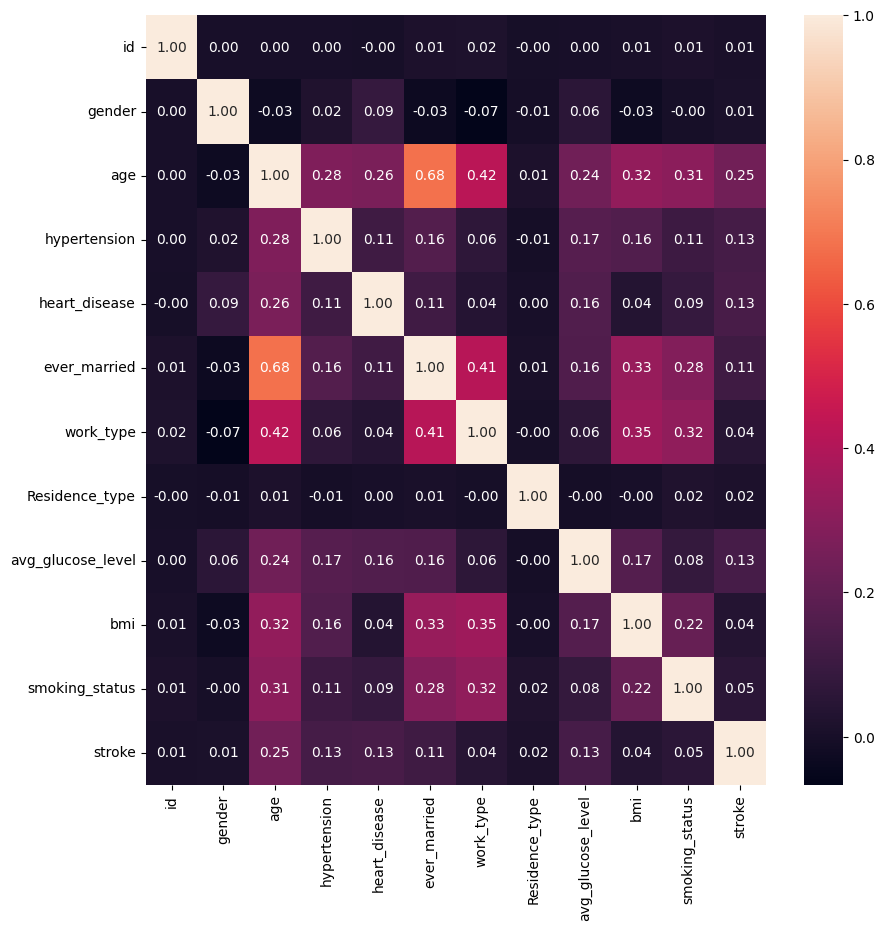

In [ ]:
# We want to check the correlation between 2 different features
correlation = df_Cardiovascular.corr()
seaborn.heatmap (correlation, annot = True, fmt=".2f")
plt.gcf().set_size_inches(10, 10)

Here, we only selected variables that may exists some relationship between the existence of stroke. age, hypertension, heart_disease, avg_glucose_level were selected. To avoid collinearity, ever_married was excluded since it has a relatively high correltionship with age, we may just pick one of them.

In [ ]:
df_Cardiovascular_log = df_Cardiovascular[['age', 'hypertension', 'heart_disease', 'avg_glucose_level']]
df_Cardiovascular_log.head()

age  hypertension  heart_disease  avg_glucose_level
0  67.0             0              1             228.69
1  61.0             0              0             202.21
2  80.0             0              1             105.92
3  49.0             0              0             171.23
4  79.0             1              0             174.12

In [ ]:
# Split the data into features and target variable
X = df_Cardiovascular_log
y = df_Cardiovascular['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Training logistic regression model
log_reg = LogisticRegression(penalty='l2', C = 1, solver='liblinear', class_weight='balanced')
log_reg.fit(X_train, y_train)

# The penalty parameter is used to specify the norm used in the penalization: l1 or l2 regularization.
# The C parameter represents inverse of regularization strength, smaller values specify stronger regularization.
# The solver parameter specifies the algorithm to use in the optimization problem.

LogisticRegression(C=1, class_weight='balanced', solver='liblinear')

In [ ]:
# Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[716 244]
 [ 15  47]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.75      0.85       960
           1       0.16      0.76      0.27        62

    accuracy                           0.75      1022
   macro avg       0.57      0.75      0.56      1022
weighted avg       0.93      0.75      0.81      1022



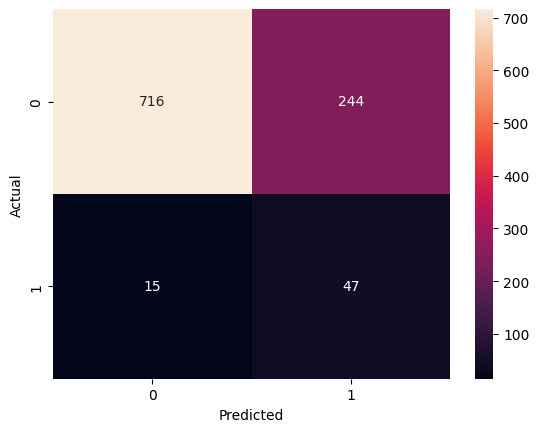

In [ ]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Here, we may choose different C to get the optimal value and the optimal value is based on f1 score.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
log_reg = LogisticRegression(solver='liblinear')
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_C = grid_search.best_params_['C']
print(best_C)

0.001


In [ ]:
log_reg = LogisticRegression(penalty='l2', C = 0.001, solver='liblinear', class_weight='balanced')
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.001, class_weight='balanced', solver='liblinear')

In [ ]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.001, class_weight='balanced', solver='liblinear')

In [ ]:
# Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[426 534]
 [  6  56]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.44      0.61       960
           1       0.09      0.90      0.17        62

    accuracy                           0.47      1022
   macro avg       0.54      0.67      0.39      1022
weighted avg       0.93      0.47      0.59      1022



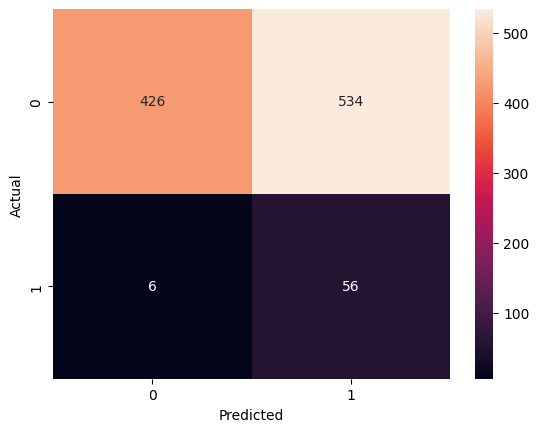

In [ ]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Logistic Regression Model Summary

In [ ]:
# Separate features and target variable

X = df_Cardiovascular[['age', 'hypertension', 'heart_disease', 'avg_glucose_level']]
y = df_Cardiovascular['stroke']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create and fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Get summary report
summary = log_reg.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.155720
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 5110
Model:                          Logit   Df Residuals:                     5105
Method:                           MLE   Df Model:                            4
Date:                Sat, 30 Sep 2023   Pseudo R-squ.:                  0.2004
Time:                        16:17:42   Log-Likelihood:                -795.73
converged:                       True   LL-Null:                       -995.19
Covariance Type:            nonrobust   LLR p-value:                 4.774e-85
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -7.4894      0.358    -20.927      0.000      -8.191      -6.788
age     

In [ ]:
all_columns = df_Cardiovascular.columns
intereted_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'smoking_status', 'stroke']

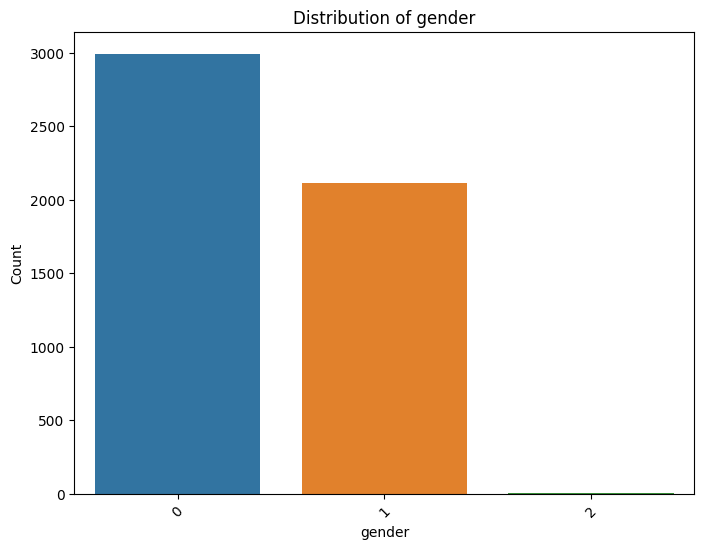

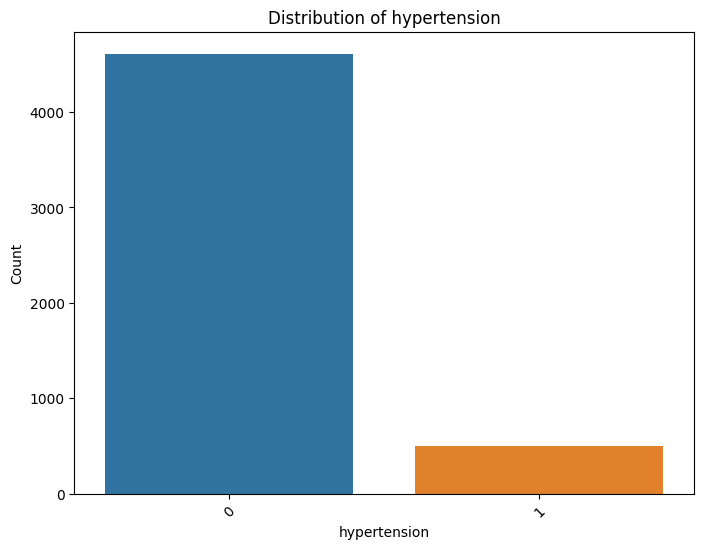

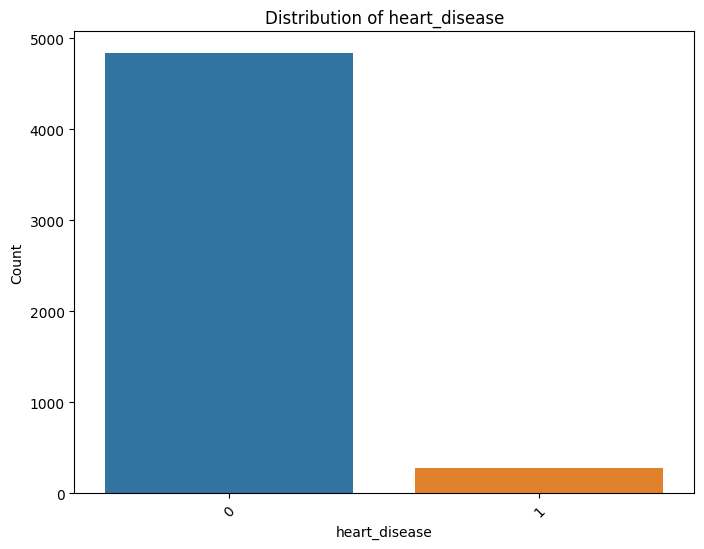

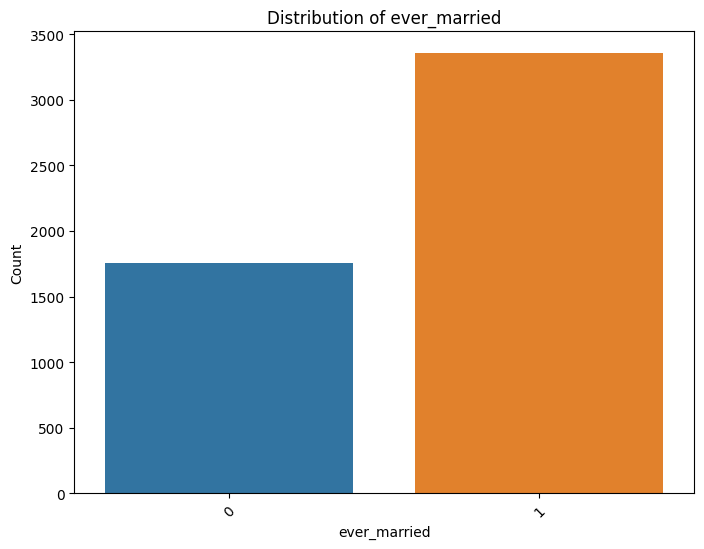

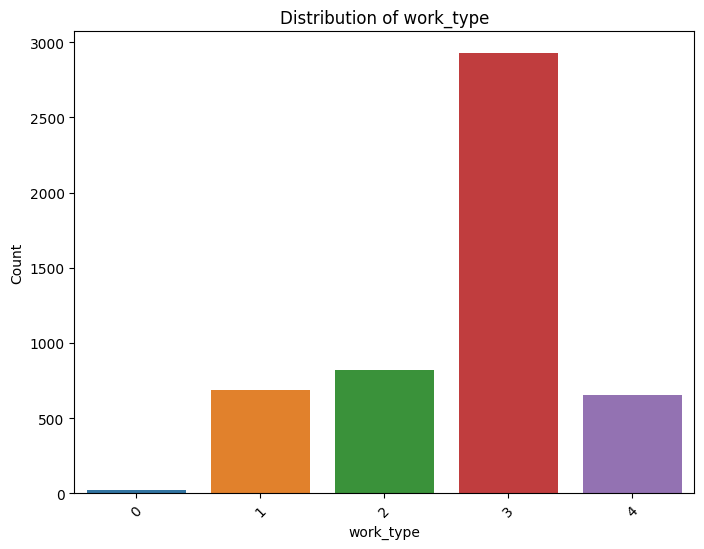

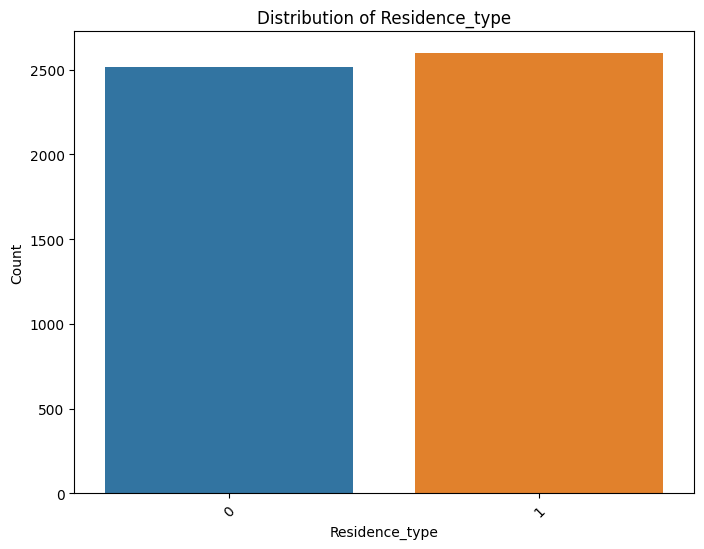

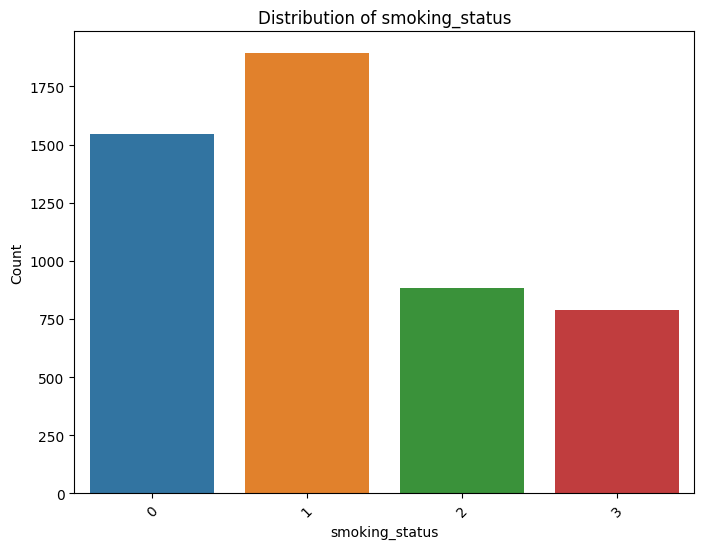

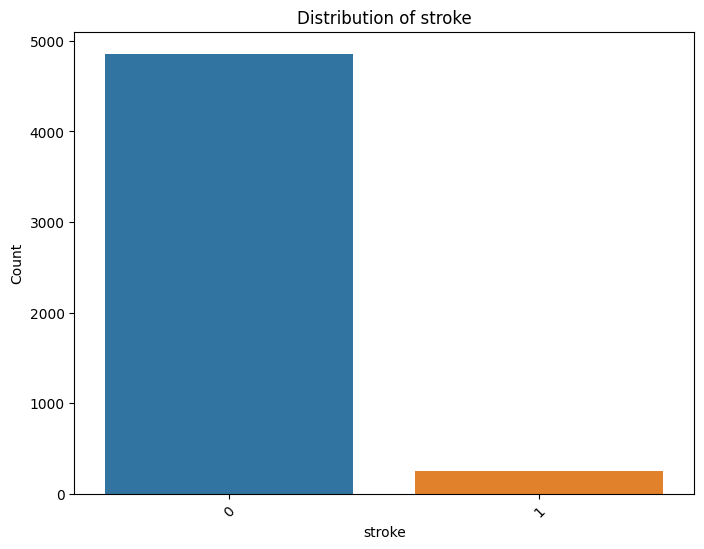

In [ ]:
for variable in intereted_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df_Cardiovascular, x=variable)
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.title(f'Distribution of {variable}')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.show()

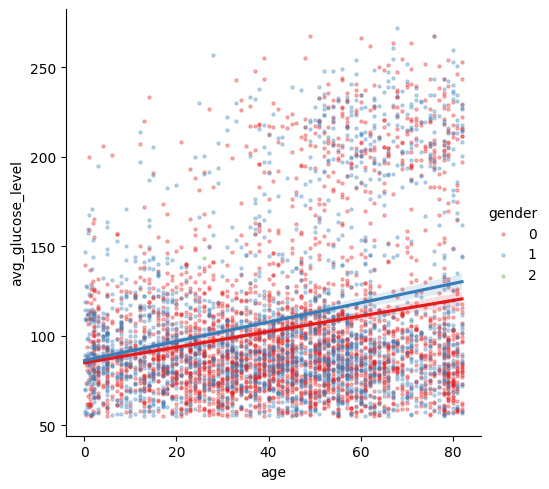

In [ ]:
import matplotlib.pyplot as plt
sns.lmplot(
    x='age',
    y='avg_glucose_level',
    data=df_Cardiovascular,
    hue='gender',
    palette='Set1',
    scatter_kws={'alpha': 0.3, 's': 5},
)

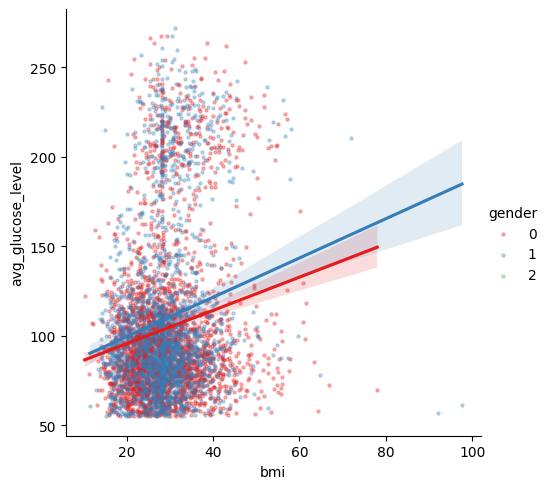

In [ ]:
import matplotlib.pyplot as plt
sns.lmplot(
    x='bmi',
    y='avg_glucose_level',
    data=df_Cardiovascular,
    hue='gender',
    palette='Set1',
    scatter_kws={'alpha': 0.3, 's': 5},
)

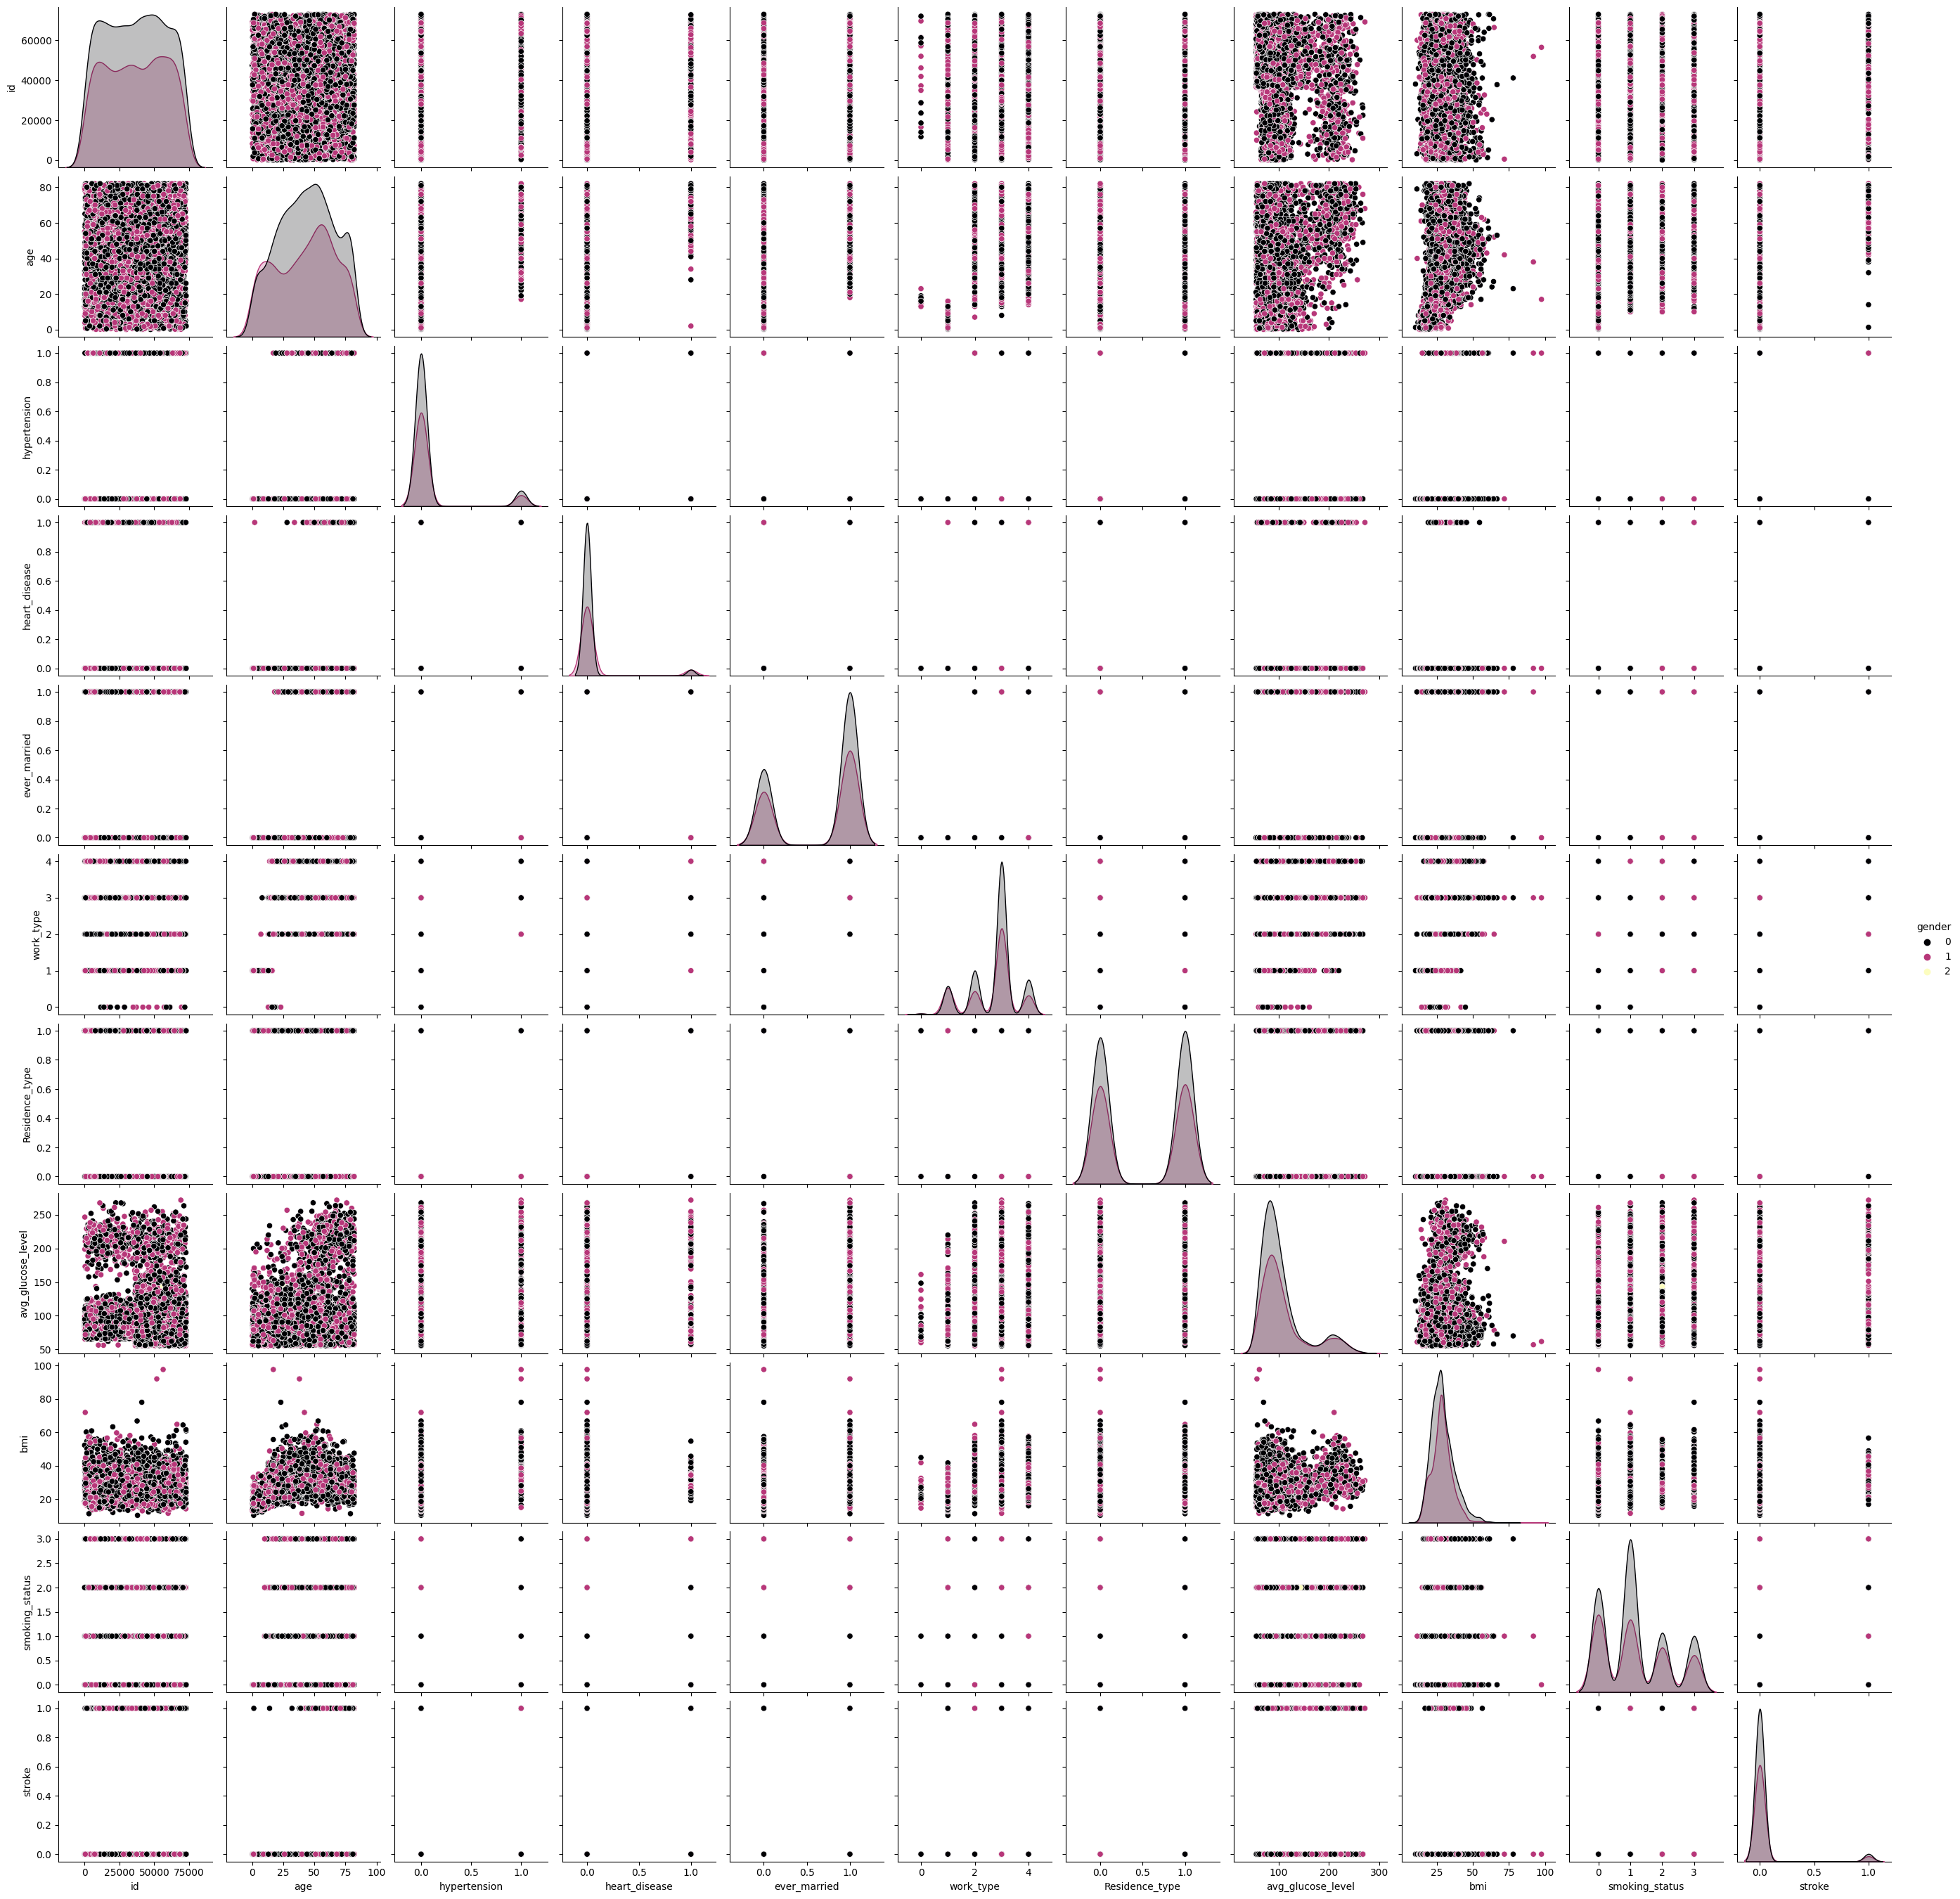

In [ ]:
sns.pairplot(df_Cardiovascular, hue='gender', palette="magma")
plt.show()

In [ ]:
df_Cardiovascular_female = df_Cardiovascular[df_Cardiovascular['gender'] == 0]
df_Cardiovascular_female

id  gender   age  hypertension  heart_disease  ever_married  \
1     51676       0  61.0             0              0             1   
3     60182       0  49.0             0              0             1   
4      1665       0  79.0             1              0             1   
7     10434       0  69.0             0              0             0   
8     27419       0  59.0             0              0             1   
...     ...     ...   ...           ...            ...           ...   
5104  14180       0  13.0             0              0             0   
5105  18234       0  80.0             1              0             1   
5106  44873       0  81.0             0              0             1   
5107  19723       0  35.0             0              0             1   
5109  44679       0  44.0             0              0             1   

      work_type  Residence_type  avg_glucose_level   bmi  smoking_status  \
1             2               0             202.21  28.1               1   
3             3               1             171.23  34.4               3   
4             2               0             174.12  24.0               1   
7             3               1              94.39  22.8               1   
8             3               0              76.15  28.1               0   
...         ...             ...                ...   ...             ...   
5104          1               0             103.08  18.6               0   
5105          3               1              83.75  28.1               1   
5106          2               1             125.20  40.0               1   
5107          2               0              82.99  30.6               1   
5109          4               1              85.28  26.2               0   

      stroke  
1          1  
3          1  
4          1  
7          1  
8          1  
...      ...  
5104       0  
5105       0  
5106       0  
5107       0  
5109       0  

[2994 rows x 12 columns]

In [ ]:
df_Cardiovascular_male = df_Cardiovascular[df_Cardiovascular['gender'] == 1]
df_Cardiovascular_male

id  gender   age  hypertension  heart_disease  ever_married  \
0      9046       1  67.0             0              1             1   
2     31112       1  80.0             0              1             1   
5     56669       1  81.0             0              0             1   
6     53882       1  74.0             1              1             1   
13     8213       1  78.0             0              1             1   
...     ...     ...   ...           ...            ...           ...   
5097  64520       1  68.0             0              0             1   
5098    579       1   9.0             0              0             0   
5099   7293       1  40.0             0              0             1   
5100  68398       1  82.0             1              0             1   
5108  37544       1  51.0             0              0             1   

      work_type  Residence_type  avg_glucose_level   bmi  smoking_status  \
0             3               1             228.69  36.6               2   
2             3               0             105.92  32.5               1   
5             3               1             186.21  29.0               2   
6             3               0              70.09  27.4               1   
13            3               1             219.84  28.1               0   
...         ...             ...                ...   ...             ...   
5097          2               1              91.68  40.8               0   
5098          1               1              71.88  17.5               0   
5099          3               0              83.94  28.1               3   
5100          2               0              71.97  28.3               1   
5108          3               0             166.29  25.6               2   

      stroke  
0          1  
2          1  
5          1  
6          1  
13         1  
...      ...  
5097       0  
5098       0  
5099       0  
5100       0  
5108       0  

[2115 rows x 12 columns]

Linear regression with response variable "avg_glucose_level"

In [ ]:
from sklearn.linear_model import LinearRegression
X_multi_female = df_Cardiovascular_female[['age','bmi']]
y_female = df_Cardiovascular_female['avg_glucose_level']

In [ ]:
# Splitting the data into training and testing sets
X_train_multi_female, X_test_multi_female, y_train_multi_female, y_test_multi_female = train_test_split(X_multi_female, y_female, test_size=0.2, random_state=42)

In [ ]:
# Create and fit the model
mlr_model_female = LinearRegression()
mlr_model_female.fit(X_train_multi_female, y_train_multi_female)

LinearRegression()

In [ ]:
y_pred_multi_female = mlr_model_female.predict(X_test_multi_female)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluating the model
print(f'Mean Squared Error (MLR): {mean_squared_error(y_test_multi_female, y_pred_multi_female)}')
print(f'R2 Score (MLR): {r2_score(y_test_multi_female, y_pred_multi_female)}')

Mean Squared Error (MLR): 1664.5723183320322
R2 Score (MLR): 0.037227205901747884


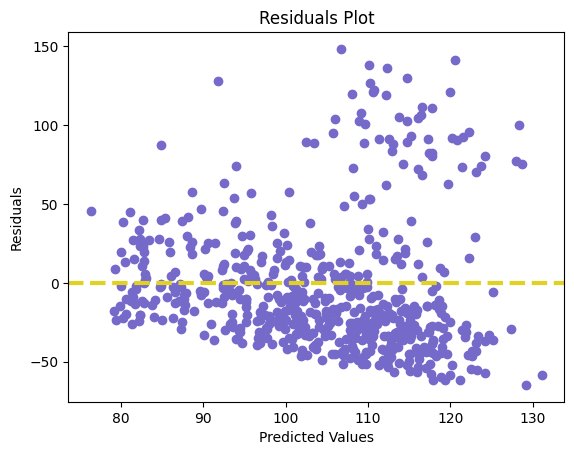

In [ ]:
residuals_female = y_test_multi_female - y_pred_multi_female
plt.scatter(y_pred_multi_female, residuals_female, color='#7569c9')
plt.axhline(y=0, linestyle='--', color='#e0d122', lw=3)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

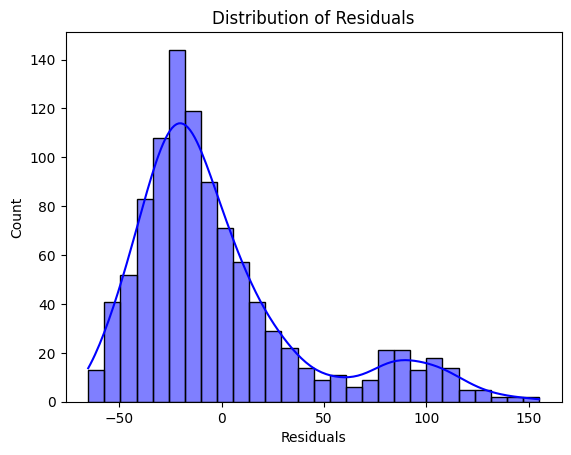

In [ ]:
# Create a histogram of residuals with a kernel density estimate (KDE)
sns.histplot(residuals_female, kde=True, color='blue')

# Set the x-axis label
plt.xlabel('Residuals')

# Set the plot title
plt.title('Distribution of residuals_female')

# Display the plot
plt.show()

In [ ]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_multi, y_train_multi)

Ridge()

In [ ]:
# Predictions
y_pred_ridge = ridge_model.predict(X_test_multi)


In [ ]:
# Evaluating the Ridge Regression model
print(f'Mean Squared Error (Ridge): {mean_squared_error(y_test_multi, y_pred_ridge)}')
print(f'R2 Score (Ridge): {r2_score(y_test_multi, y_pred_ridge)}')

Mean Squared Error (Ridge): 1819.0711027098257
R2 Score (Ridge): 0.05396989344043379
